In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import keras
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'D:\\ML\\Dog_Breed'

In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
labels  = pd.read_csv('labels.csv')

In [5]:
labels['breed'].nunique()

120

In [6]:
labels['breed'].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
great_pyrenees                    111
pomeranian                        111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
cairn                             106
leonberg                          106
japanese_spaniel                  105
beagle                            105
blenheim_spaniel                  102
australian_terrier                102
miniature_pinscher                102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
siberian_husky                     95
norwegian_elkhound                 95
whippet                            95
pug         

In [7]:
X_train = []
y_train = []
X_test = []
im_size = 224

In [8]:
from tqdm import tqdm
i = 0
for f, breed in tqdm(labels.values):
    img = cv2.imread('D:\\ML\\Dog_Breed\\train\\{}.jpg'.format(f))
    #label = one_hot_labels[i]
    #X_train.append(img)
    X_train.append(cv2.resize(img, (im_size, im_size)))
    #y_train.append(label)
    i += 1

100%|███████████████████████████████████████████████████████████████████████████| 10222/10222 [01:41<00:00, 101.14it/s]


In [9]:
len(X_train)

10222

In [10]:
X_train = np.array(X_trai)

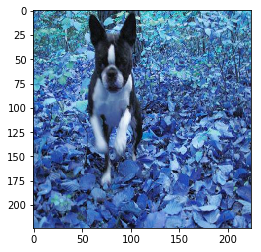

In [11]:
plt.imshow(X_train[0])

original Image vs Normalized image

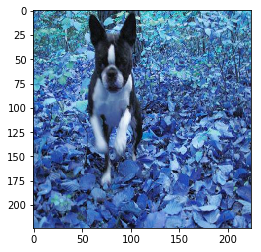

In [12]:
plt.imshow(X_train[0] )

In [13]:
targets_series = pd.Series(labels['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)

#y_train = np.array(y_train, np.uint8)

In [14]:
one_hot_labels = np.asarray(one_hot) 

In [15]:
y_train = one_hot_labels

In [16]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet169

In [21]:
base_model = VGG16(weights='imagenet', include_top=False,  input_shape=(im_size, im_size, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(120, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor='log_loss', patience=3, verbose=1)]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
X_train.shape

(10222, 224, 224, 3)

In [23]:
len(y_train)

10222

In [24]:
model.fit(X_train, y_train, epochs=10, verbose=1, callbacks= callbacks_list)

Epoch 1/10


 6496/10222 [==================>...........] - ETA: 21:45 - loss: 16.1181 - acc: 0.0000e+0 - ETA: 11:49 - loss: 16.0340 - acc: 0.0000e+0 - ETA: 8:30 - loss: 16.0220 - acc: 0.0000e+0 - ETA: 6:50 - loss: 15.7471 - acc: 0.0078   - ETA: 5:51 - loss: 15.6770 - acc: 0.00 - ETA: 5:11 - loss: 15.7505 - acc: 0.00 - ETA: 4:42 - loss: 15.8030 - acc: 0.00 - ETA: 4:20 - loss: 15.8168 - acc: 0.00 - ETA: 4:03 - loss: 15.7904 - acc: 0.00 - ETA: 3:50 - loss: 15.7680 - acc: 0.00 - ETA: 3:39 - loss: 15.7999 - acc: 0.00 - ETA: 3:29 - loss: 15.7844 - acc: 0.00 - ETA: 3:21 - loss: 15.8080 - acc: 0.00 - ETA: 3:14 - loss: 15.8301 - acc: 0.00 - ETA: 3:08 - loss: 15.7910 - acc: 0.00 - ETA: 3:03 - loss: 15.7800 - acc: 0.00 - ETA: 2:58 - loss: 15.7998 - acc: 0.00 - ETA: 2:54 - loss: 15.8175 - acc: 0.00 - ETA: 2:50 - loss: 15.8333 - acc: 0.00 - ETA: 2:46 - loss: 15.8476 - acc: 0.00 - ETA: 2:43 - loss: 15.8365 - acc: 0.00 - ETA: 2:40 - loss: 15.8493 - acc: 0.00 - ETA: 2:38 - loss: 15.8610 - acc: 0.00 - ETA: 2:35 - 

10222/10222 [==============================] - ETA: 45s - loss: 15.8244 - acc: 0.017 - ETA: 44s - loss: 15.8258 - acc: 0.016 - ETA: 44s - loss: 15.8272 - acc: 0.016 - ETA: 43s - loss: 15.8286 - acc: 0.016 - ETA: 43s - loss: 15.8300 - acc: 0.016 - ETA: 43s - loss: 15.8314 - acc: 0.016 - ETA: 42s - loss: 15.8328 - acc: 0.016 - ETA: 42s - loss: 15.8341 - acc: 0.016 - ETA: 41s - loss: 15.8331 - acc: 0.016 - ETA: 41s - loss: 15.8321 - acc: 0.016 - ETA: 41s - loss: 15.8310 - acc: 0.016 - ETA: 40s - loss: 15.8324 - acc: 0.016 - ETA: 40s - loss: 15.8314 - acc: 0.016 - ETA: 39s - loss: 15.8327 - acc: 0.016 - ETA: 39s - loss: 15.8340 - acc: 0.016 - ETA: 39s - loss: 15.8353 - acc: 0.016 - ETA: 38s - loss: 15.8343 - acc: 0.016 - ETA: 38s - loss: 15.8333 - acc: 0.016 - ETA: 37s - loss: 15.8323 - acc: 0.016 - ETA: 37s - loss: 15.8336 - acc: 0.016 - ETA: 37s - loss: 15.8349 - acc: 0.016 - ETA: 36s - loss: 15.8361 - acc: 0.016 - ETA: 36s - loss: 15.8374 - acc: 0.016 - ETA: 35s - loss: 15.8342 - acc: 0

 3072/10222 [========>.....................] - ETA: 1:59 - loss: 16.1181 - acc: 0.0000e+ - ETA: 1:57 - loss: 16.1181 - acc: 0.0000e+ - ETA: 1:58 - loss: 15.9502 - acc: 0.0104   - ETA: 1:57 - loss: 15.9922 - acc: 0.00 - ETA: 1:56 - loss: 16.0174 - acc: 0.00 - ETA: 1:57 - loss: 16.0341 - acc: 0.00 - ETA: 1:56 - loss: 15.9742 - acc: 0.00 - ETA: 1:55 - loss: 15.9922 - acc: 0.00 - ETA: 1:55 - loss: 16.0062 - acc: 0.00 - ETA: 1:55 - loss: 16.0174 - acc: 0.00 - ETA: 1:54 - loss: 16.0265 - acc: 0.00 - ETA: 1:54 - loss: 16.0341 - acc: 0.00 - ETA: 1:54 - loss: 15.9631 - acc: 0.00 - ETA: 1:53 - loss: 15.9742 - acc: 0.00 - ETA: 1:53 - loss: 15.8834 - acc: 0.01 - ETA: 1:52 - loss: 15.8665 - acc: 0.01 - ETA: 1:52 - loss: 15.8517 - acc: 0.01 - ETA: 1:52 - loss: 15.8385 - acc: 0.01 - ETA: 1:52 - loss: 15.8532 - acc: 0.01 - ETA: 1:51 - loss: 15.8413 - acc: 0.01 - ETA: 1:51 - loss: 15.8305 - acc: 0.01 - ETA: 1:50 - loss: 15.8436 - acc: 0.01 - ETA: 1:50 - loss: 15.8336 - acc: 0.01 - ETA: 1:50 - loss: 15.

KeyboardInterrupt: 

In [ ]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)



In [ ]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

In [ ]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)]

In [ ]:
model.fit(X_train, y_train, epochs=10, verbose=1, callbacks= callbacks_list)

In [ ]:
   test_labels = pd.read_csv('sample_submission.csv')

In [ ]:
for f in tqdm(test_labels['id'].values):
    img = cv2.imread('D:\\ML\\Dog_Breed\\test\\{}.jpg'.format(f))
    #label = one_hot_labels[i]
    X_test.append(cv2.resize(img, (im_size, im_size)))
    #y_train.append(label)

In [ ]:
X_test  = np.array(X_test)

In [ ]:
preds  = model.predict(X_test, verbose = 1)

In [ ]:
submission = pd.DataFrame(preds)

In [ ]:
one_hot.columns

In [ ]:
submission.columns = one_hot.columns

In [ ]:
submission.insert(0, 'id', test_labels['id'])

In [ ]:
submission.to_csv('submission_densenet_finetuning.csv', index= False)